In [2]:
import numpy as np
import pandas as pd
import os
import re
import string
base = "../../data/clean/"
pd.set_option('display.max_rows', 150)

In [3]:
tweetdf = pd.read_csv(base+'loctrisma2016.csv')
len(tweetdf)

814398

In [5]:
tweetdf.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,created_at,from_user_id,source,text,to_user_id,to_user_name,...,location_name,country,location_full_name,location_type,country_code,collected_at,lga,state,lat,lng
0,0,0,19,813212169387044864,2016-12-26 02:37:44.000000,4721717942,"<a href=""http://www.rfs.nsw.gov.au"" rel=""nofol...",ADVICE. Bush Fire. Central Coast (Kulnura Cree...,NaN,NaN,...,Kulnura,Australia,"Kulnura, New South Wales",neighborhood,AU,2017-05-14,Central Coast,NSW,-33.232000,151.218000
1,1,1,21,794718047504367616,2016-11-05 01:48:42.000000,4721717942,"<a href=""http://www.rfs.nsw.gov.au"" rel=""nofol...",ADVICE. Bush Fire. Eurobodalla (Oulla Creek Fi...,NaN,NaN,...,Deua,Australia,"Deua, New South Wales",neighborhood,AU,2017-05-14,Eurobodalla,NSW,-35.877302,149.875827
2,2,2,22,796476112012333057,2016-11-09 22:14:37.000000,4721717942,"<a href=""http://www.rfs.nsw.gov.au"" rel=""nofol...",ADVICE. Bush Fire. Dungog (Mt Ebsworth) at 10 ...,NaN,NaN,...,Cambra,Australia,"Cambra, New South Wales",neighborhood,AU,2017-05-14,Dungog,NSW,-32.442062,151.875297
3,3,3,26,796400233412370432,2016-11-09 17:13:06.000000,4721717942,"<a href=""http://www.rfs.nsw.gov.au"" rel=""nofol...",ADVICE. Bush Fire. Port Macquarie-Hastings (15...,NaN,NaN,...,Marlo Merrican,Australia,"Marlo Merrican, New South Wales",neighborhood,AU,2017-05-14,Port Macquarie-Hastings,NSW,-31.228983,152.671562
4,4,4,39,715847831349800961,2016-04-01 10:26:37.000000,40962229,"<a href=""http://www.twitter.com"" rel=""nofollow...",About half way to Dubbo https://t.co/pslONhZKdY,NaN,NaN,...,Lithgow,Australia,"Lithgow, New South Wales",city,AU,2013-01-01 00:00:01,Lithgow,NSW,-33.482734,150.157017


In [17]:
replies_df = tweetdf[tweetdf.to_user_id.notnull()]
print(len(replies_df))
replyer_ids = replies_df.from_user_id.unique()
tweetdf = tweetdf[tweetdf.from_user_id.isin(replyer_ids)]
tweetdf = tweetdf.sort_values(by='tweet_id')
print(len(tweetdf))
tweetdf.head()

306506
611675


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,created_at,from_user_id,source,text,to_user_id,to_user_name,...,location_name,country,location_full_name,location_type,country_code,collected_at,lga,state,lat,lng
375922,375922,412183,246385,682712842600972291,2016-01-01 00:00:00.000000,106082182,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@legallyfm @XFilesNews @thexfiles @mynewsaga &...,3.902348e+07,legallyfm,...,Glen Innes,Australia,"Glen Innes, New South Wales",city,AU,2013-01-01 00:00:01,Glen Innes Severn,NSW,-29.751838,151.736189
132916,132916,145044,79326,682712982909005824,2016-01-01 00:00:33.000000,109140867,"<a href=""http://instagram.com"" rel=""nofollow"">...","Best coffee, food and swevice on the Hume and ...",NaN,NaN,...,Berremangra,Australia,"Berremangra, New South Wales",neighborhood,AU,2013-01-01 00:00:01,Hilltops,NSW,-34.830222,148.516892
565350,565350,623155,1323531,682713033836085248,2016-01-01 00:00:46.000000,178662965,"<a href=""http://twitter.com/download/android"" ...",Best start to 2016 - a morning at my favourite...,NaN,NaN,...,Dudley,Australia,"Dudley, Newcastle",neighborhood,AU,2013-01-01 00:00:01,Lake Macquarie,NSW,-32.990000,151.718000
93485,93485,102839,1296562,682713138442059776,2016-01-01 00:01:11.000000,4459544179,"<a href=""http://twitter.com/download/iphone"" r...","@Kymspiracy dear spiracy, why do the animals ...",4.671249e+09,Kymspiracy,...,Central Coast,Australia,"Central Coast, New South Wales",city,AU,2017-05-14,Central Coast,NSW,-33.320842,151.233559
217092,217092,238686,1329607,682713707659436032,2016-01-01 00:03:26.000000,822349225,"<a href=""http://twitter.com/download/android"" ...",@FraserBeecroft @hullkr_online looks great :) ...,8.604736e+08,FraserBeecroft,...,Port Macquarie,Australia,"Port Macquarie, New South Wales",city,AU,2013-01-01 00:00:01,Port Macquarie-Hastings,NSW,-31.433333,152.900000


In [18]:
by_lga = tweetdf.groupby(['lga'], as_index=False).agg({'text':lambda x:' '.join(x)})
by_lga.columns = ['LGA','text']
by_lga

,LGA,text
0,Albury,#2015bestnine🌟 #BestOfNine2015 #byebye #2015 #...
1,Armidale Regional,2016 the year of the rustleocalypse @RebeccaRa...
2,Ballina,Met a hero of mine. Things got weird. #weirdal...
3,Balranald,Crackin night on the river. https://t.co/lGYg4...
4,Bathurst Regional,@ReneeYoungWWE Happy New Year to you &amp; you...
5,Bayside,@tamasys @mattRan wtf is maths circus? @toddjt...
6,Bega Valley,Suns out guns out. Coffee time. #crossfitgirls...
7,Bellingen,More from the Promised Lands #normanheywood #l...
8,Berrigan,@MoniqueAnnalyss hotttt 🔥🔥🔥 @MoniqueAnnalyss a...
9,Blacktown,Ahhh Tumblr. I currently have a hammock in the...


In [32]:
import string
import emoji
from unidecode import unidecode
from tokenizer import tokenizer

# takes a dataframe with a column called "text" and adds a column called "cleaned":
def clean_text(df):
    # Remove handles and urls but not hash tags.
    # Handles might be useful for an is-reply feature but not for analysis of the text
    smc_tokenizer = tokenizer.TweetTokenizer(preserve_handles=False, preserve_hashes=True, preserve_len=False,
                                             preserve_case=False, preserve_url=False)

    # First, remove all emojis, then decode all unicode, then put emojis at the end
    docs = []
    for doc in df['text']:
        emojis = ' '.join([c for c in doc if c in emoji.UNICODE_EMOJI])
        stripped = ''.join([c for c in doc if c not in emoji.UNICODE_EMOJI])
        decoded = unidecode(stripped)
        docs.append(' '.join([decoded, emojis]))

    # TweetTokenizer weirdly keeps punctuation separated by space as one token:
    puncts = set(string.punctuation + ' ')
    docs = [smc_tokenizer.tokenize(doc) for doc in docs]
    cleaned = []
    for doc in docs:
        clean = [token for token in doc if not(len(token) == 1 and token not in emoji.UNICODE_EMOJI)
                    and not(all(c in puncts for c in token))]
        cleaned.append(' '.join(clean))

    # Add cleaned tokens as an attribute to LGA:
    cs = pd.Series(cleaned)
    df['cleaned'] = cs

In [33]:
clean_text(by_lga)
by_lga.to_csv('../../data/clean/trisma2016_cleaned_replyers_text_by_lga.csv')

In [34]:
docs = by_lga[['LGA','cleaned']]
docs

,LGA,cleaned
0,Albury,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,Armidale Regional,2016 the year of the rustleocalypse woohoo thi...
2,Ballina,met hero of mine things got weird #weirdalyank...
3,Balranald,crackin night on the river #ontheroadagain eus...
4,Bathurst Regional,happy new year to you your fam as well miss mi...
5,Bayside,wtf is maths circus sounds like it must've bee...
6,Bega Valley,suns out guns out coffee time #crossfitgirls #...
7,Bellingen,more from the promised lands #normanheywood #l...
8,Berrigan,hottt appreciate your hotness monique it's 201...
9,Blacktown,ahhh tumblr currently have hammock in the livi...


In [24]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from sklearn.feature_extraction.text import TfidfVectorizer
from timeit import default_timer as timer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word', tokenizer=smc_tokeniser, ngram_range=(1,3),
    max_features=5000, stop_words='english', token_pattern=None)  

In [26]:
target_df = pd.read_csv("../../data/clean/filtered_nonlog_target.csv").iloc[:,1:]
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,cleaned
0,Albury,#2015bestnine #bestofnine2015 #byebye #2015 #h...
1,Armidale Regional,2016 the year of the rustleocalypse woohoo thi...
2,Ballina,met hero of mine things got weird #weirdalyank...
3,Bathurst Regional,happy new year to you your fam as well miss mi...
4,Bayside,wtf is maths circus sounds like it must've bee...
5,Bega Valley,suns out guns out coffee time #crossfitgirls #...
6,Bellingen,more from the promised lands #normanheywood #l...
7,Berrigan,hottt appreciate your hotness monique it's 201...
8,Blacktown,ahhh tumblr currently have hammock in the livi...
9,Bland,kunnen we een fietswerkbezoek van maken het wa...


In [27]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def tfidf_cv(X, y, max_features=None, folds=5):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=lambda x: np.abs(importants.get(x)), reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

Redo grid search on first target for optimal max features

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 404.11491899518296 seconds
MOST IMPORTANT FEATURES:
big 0.108606123484
come 0.0534376958133
noth 0.0521445439008
got 0.0410092736513
hope 0.0335246656199
love 0.0297506534966
girl 0.0284993374106
wait 0.0281948184556
😊 0.0255954465501
hear 0.0246576586092
👍 0.0244096651386
sydney 0.0231128975579
better 0.0221178789114
way 0.0187182979627
home 0.0170524994308
great 0.0164643775275
make 0.0135224739793
bit 0.0134949062241
hous 0.0130789407949
mani 0.0125268490455
R2: -0.107621169322
RMSE: 308.658824334
MAPE: 77.2596553463
Mean APE Baseline: 72.0914035637


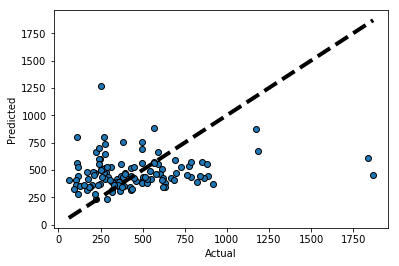

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 403.12239319994114 seconds
MOST IMPORTANT FEATURES:
noth 0.085440410302
fix 0.0528845704336
😭 0.036358334736
season 0.0266015149759
girl 0.0263663739789
finish 0.0227182254332
state 0.0218059851596
dog 0.020557529676
wait 0.0189038959641
rain 0.0184625074416
huge 0.0179210689414
thing 0.0163243130886
ago 0.015511559605
big 0.0153581306581
happi birthday 0.015017325265
haven't 0.0149325928213
make 0.0141855360895
end 0.0137362102341
sydney 0.0136023074092
white 0.0134160947405
R2: -0.177798746149
RMSE: 318.286792499
MAPE: 72.4021702979
Mean APE Baseline: 72.0914035637


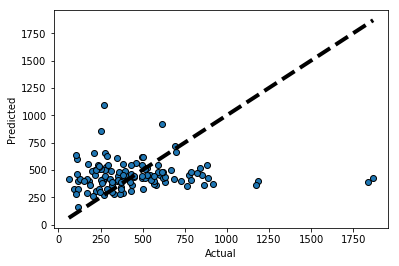

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 404.91055245208554 seconds
MOST IMPORTANT FEATURES:
heat 0.0855379484358
ive 0.0541205898474
noth 0.0420972080267
nooo 0.034521558594
ground 0.0243394183255
wait 0.0231828780508
proud 0.0230624860704
sleep 0.0217623325234
condit 0.0187290133828
bodi 0.0178808592426
i'v seen 0.0165027043668
destroy 0.0163328039868
great day 0.0159511504754
felt 0.015626422885
hill 0.0149052652882
gave 0.014043863937
sydney 0.0137865595511
#sydney 0.0136998465396
week 0.0128855398204
round 0.0128390829262
R2: -0.0280395167569
RMSE: 297.363718047
MAPE: 69.0113586872
Mean APE Baseline: 72.0914035637


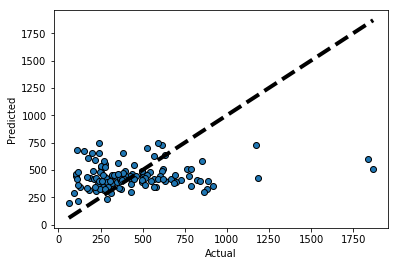

Finished processing 40 records...
Finished processing 80 records...
Finished processing 120 records...
Finished TF-IDF 3 fold cross validation in 407.01173196011223 seconds
MOST IMPORTANT FEATURES:
heat 0.0772817811481
aliv 0.0299979892204
big 0.0263194139097
ghost 0.0254347085137
ground 0.0246650412352
boot 0.0243106933055
cold 0.0238035157092
girl 0.0196956917208
yeah that' 0.0183698993764
ain't 0.0162215160412
honey 0.016197776005
👍 0.0160087752167
broken hill 0.0133874143757
appl 0.0133455912094
tend 0.0132662456749
black 0.0128132855445
dare 0.0127604636962
shot 0.0122561353618
onlin 0.0121307025104
lil 0.0119295574272
R2: 0.0030009971537
RMSE: 292.840025391
MAPE: 66.0940124993
Mean APE Baseline: 72.0914035637


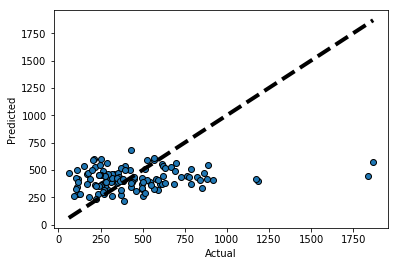

In [30]:
for f in [200,500,2000,5000]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','Assault - domestic violence']], max_features=f, folds=3)
    end = timer()
    print('Finished TF-IDF 3 fold cross validation in',end-start,'seconds')
    tfidf_metrics(predictions, importants)

Replyers only it seems a much higher max_features works best. Possibly this is exclduign imprtance of polacenames from media feeds. Stick with 5000:

TFIDF RFR BY LGA FOR REPLYERS TWEETS ONLY. MAX FEATURES 5000.
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 692.0818861150183 seconds
MOST IMPORTANT FEATURES:
heat 0.0927497104177
ground 0.0440573152062
tall 0.0263433500052
header 0.0245951305665
plant 0.0230054954909
cover 0.0203908988529
yesterday 0.016020845296
desert 0.0138964922391
cloth 0.0135688336882
plot 0.0132148955363
mighti 0.0126607418889
bloodi 0.0121245235434
yeah that' 0.0118418102759
big 0.0116792178597
thi mean 0.0116501527865
rail 0.0114853181823
univers 0.0111649478379
properti 0.0111639244009
watch 0.0109742712543
40 0.0104098861927
R2: -0.0921344452443
RMSE: 306.493399516
MAPE: 68.0404208816
Mean APE Baseline: 72.0914035637


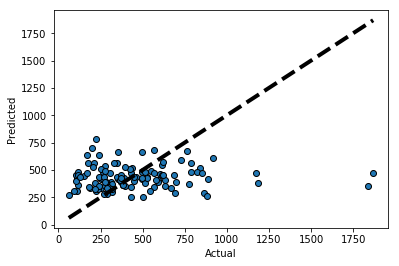

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 684.7336809849367 seconds
MOST IMPORTANT FEATURES:
opal 0.0276832195151
heat 0.0261376723017
entertain 0.024711773745
dubbo 0.0213792593447
header 0.0202278739073
plant 0.0189996389283
clear 0.0174008330925
martin 0.0165792547107
telstra 0.0161532465214
region 0.0141594312356
ground 0.0129910768942
#health 0.012193341482
bin 0.0119851086266
develop 0.0103694229046
machin 0.0103281192522
sydney 0.00968002281333
morn sydney 0.00949981941918
yeah that' 0.00896716214096
rout 0.00847427998504
bend 0.00841387316585
R2: -0.149368286706
RMSE: 260.629831081
MAPE: 61.7180474027
Mean APE Baseline: 59.8326771602


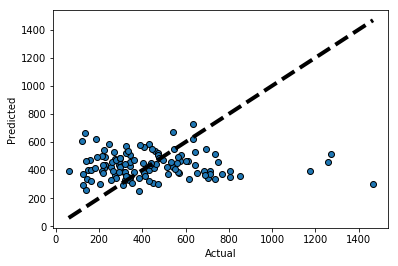

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 683.6219008180778 seconds
MOST IMPORTANT FEATURES:
da 0.0497016767494
ama 0.032299950858
io 0.0250029702523
biz 0.0233340002208
sydney 0.0231091318681
abi 0.0205390822725
tap 0.0202320595275
sen 0.0196538230071
ben 0.0183451377303
phone 0.0171956121864
gen 0.0164818535587
la 0.0163874916044
iyi 0.0152109968483
password 0.0151578833066
bana 0.0150500993976
appl 0.0146144058433
citi 0.01346701191
cok 0.0132162814293
yummi yummi 0.0130887364237
valid 0.0129584969215
R2: 0.0712322664673
RMSE: 278.713503446
MAPE: 50.5212668836
Mean APE Baseline: 50.564378615


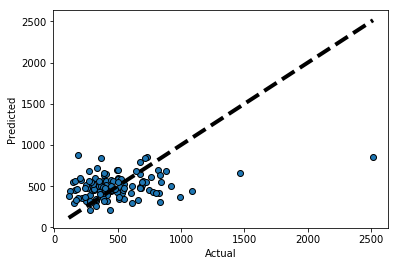

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 680.6324122261722 seconds
MOST IMPORTANT FEATURES:
#sydney 0.0821174551264
region 0.0356700075165
entertain 0.0285653912285
sydney 0.0263046867992
#indigen 0.0216833652405
polli 0.0194237254696
appl 0.0160883999302
south wale 0.0135054857215
doesn't 0.0129905292553
yr 0.0128887753267
independ 0.0123997245067
#agchatoz 0.0120087252505
brad 0.0114011895087
refus 0.0108229719496
develop 0.0105507550839
qualifi 0.00970757403545
#dog 0.00913313289657
😂 0.00887286835264
emot 0.00871387896562
uncl 0.00845957682558
R2: 0.00170383060806
RMSE: 93.2716770109
MAPE: 51.3949527809
Mean APE Baseline: 53.0821806583


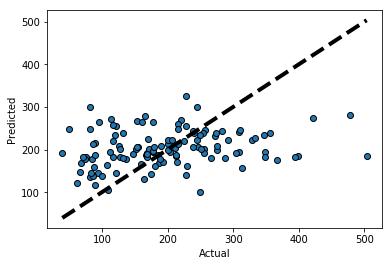

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 658.267830898054 seconds
MOST IMPORTANT FEATURES:
heat 0.103805876992
ala 0.0552327136021
plant 0.0303424650901
fix 0.021939825932
noth 0.0196178604958
small 0.0193834611209
appl 0.0174777983582
know thi 0.0153747979819
sydney 0.0152404821752
thank thank 0.0148835940989
hope good 0.014293979711
dubbo 0.0141163809286
univers 0.0133029935727
#sydney 0.0129702072961
20 0.0122240401387
ground 0.0117927764974
cattl 0.0111598923814
cool 0.0109779698151
broken hill 0.0108778665097
moon 0.0104709743539
R2: 0.0202081806135
RMSE: 567.049436838
MAPE: 49.6155058731
Mean APE Baseline: 53.4238936165


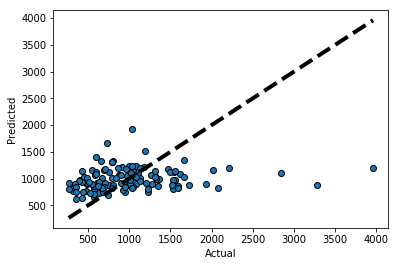

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 652.4241102340166 seconds
MOST IMPORTANT FEATURES:
invest 0.0629708949362
#sydney 0.041444408977
region 0.0313713697743
io 0.0251014405953
tomorrow 0.0224103728443
sydney 0.0214749452831
support 0.0193004839624
rail 0.017544309746
2016 0.0171920992285
bu 0.0169600430606
version 0.0163979827765
birthday 0.0160840894208
farmer 0.0156754290537
appl 0.0138032635529
drive 0.0126868172587
don't miss 0.0107134175978
new south 0.0101131724539
materi 0.00953781629908
discuss 0.00936501652903
app 0.00933906974049
R2: 0.153713748296
RMSE: 137.221570721
MAPE: 92.4167072187
Mean APE Baseline: 126.659859832


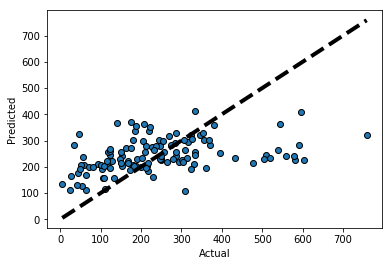

In [31]:
tfidf_output = pd.DataFrame()
print('TFIDF RFR BY LGA FOR REPLYERS TWEETS ONLY. MAX FEATURES 5000.')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [35]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_2016_rfr_replyers_preds.csv",index=False)

In [38]:
tweetdf = pd.read_csv(base+'loctrisma2016.csv')
tweetdf = tweetdf[-tweetdf.from_user_id.isin(replyer_ids)]
tweetdf = tweetdf.sort_values(by='tweet_id')
print(len(tweetdf))
tweetdf.head()

202723


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,created_at,from_user_id,source,text,to_user_id,to_user_name,...,location_name,country,location_full_name,location_type,country_code,collected_at,lga,state,lat,lng
33932,33932,34218,503413,682712878915260418,2016-01-01 00:00:09.000000,269023896,"<a href=""http://sandaysoft.com/"" rel=""nofollow...",Temp: 33.1°C Wind: 5kph Pressure: 995.9hpa Fal...,NaN,NaN,...,Baradine,Australia,"Baradine, New South Wales",city,AU,2013-01-01 00:00:01,Warrumbungle Shire,NSW,-30.950000,149.066667
266436,266436,291148,502347,682712884565049344,2016-01-01 00:00:10.000000,379712969,"<a href=""http://sandaysoft.com/"" rel=""nofollow...","Wind 2.7 kts NE. Barometer 1017.9 mb, Falling ...",NaN,NaN,...,Raymond Terrace,Australia,"Raymond Terrace, New South Wales",city,AU,2013-01-01 00:00:01,Port Stephens,NSW,-32.754408,151.767512
615171,615171,676088,502113,682713846880993280,2016-01-01 00:03:59.000000,20338706,"<a href=""http://sandaysoft.com/"" rel=""nofollow...","Wind 3 km/h W. Barometer 1013.75 hPa, Falling ...",NaN,NaN,...,Eungai Creek,Australia,"Eungai Creek, New South Wales",neighborhood,AU,2013-01-01 00:00:01,Nambucca,NSW,-30.832439,152.879407
685123,685123,755053,1338440,682714211739287553,2016-01-01 00:05:26.000000,236748655,"<a href=""http://twitter.com/download/android"" ...",Already feeling post-holiday blues? Shake it o...,NaN,NaN,...,Bowral - Mittagong,Australia,"Bowral - Mittagong, New South Wales",city,AU,2013-01-01 00:00:01,Wingecarribee,NSW,-34.477707,150.419639
219379,219379,240973,1337175,682714211739287553,2016-01-01 00:05:26.000000,236748655,"<a href=""http://twitter.com/download/android"" ...",Already feeling post-holiday blues? Shake it o...,NaN,NaN,...,Bowral - Mittagong,Australia,"Bowral - Mittagong, New South Wales",city,AU,2017-05-14,Wingecarribee,NSW,-34.477707,150.419639


In [39]:
by_lga = tweetdf.groupby(['lga'], as_index=False).agg({'text':lambda x:' '.join(x)})
by_lga.columns = ['LGA','text']
clean_text(by_lga)
by_lga.to_csv('../../data/clean/trisma2016_cleaned_broadcasters_text_by_lga.csv')

In [40]:
docs = by_lga[['LGA','cleaned']]
target_df = pd.read_csv("../../data/clean/filtered_nonlog_target.csv").iloc[:,1:]
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,cleaned
0,Albury,rare night out without the kids almost date ni...
1,Armidale Regional,tranquility in the park moore park inn boutiqu...
2,Ballina,happy new year to all my pals back home in the...
3,Bathurst Regional,ahuganisutanren tsuteindoren kayotsutesi tsuch...
4,Bayside,#1800 beer wench thanks the pic rani abfab fan...
5,Bega Valley,ocean pool #10dayrvtrip bermagui blue pool oce...
6,Bellingen,dorrigo antiques not open dorrigo new south wa...
7,Berrigan,8pm and still 30 degrees they are loving it up...
8,Blacktown,#wetandwildsydney is still open very few peopl...
9,Bland,weethalle #farm #country #rural #reddirt #suns...


TFIDF RFR BY LGA FOR BROADCASTERS TWEETS ONLY. MAX FEATURES 5000.
Assault - domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 275.90656913700514 seconds
MOST IMPORTANT FEATURES:
92 0.0813025152225
29 dec 0.0706907330549
coonambl 0.0409066039438
gwydir 0.0294373725832
wa 0.02540062774
love 0.024565089267
time 0.0211575817673
#grassfir #nswfire grass 0.0202448939943
29 dec 2016 0.0200267662228
#nswfire grass 0.0197242359364
gwydir hwi 0.016119397402
forb 0.014723942602
good 0.0136009435636
sydney 0.0127129186767
56 0.0121688568753
pub 0.0120321755315
11 nov 0.0114291437663
#grassfir advic bush 0.0100987143564
25 nov 0.00995290829972
#nswpf #mvatransport 0.00914292825107
R2: 0.182954029037
RMSE: 265.097920015
MAPE: 57.0638931995
Mean APE Baseline: 72.0914035637


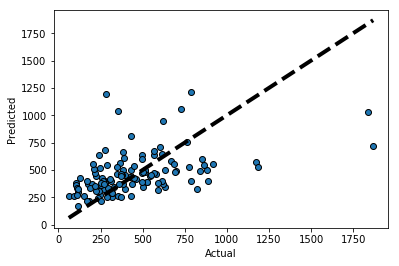

Assault - non-domestic violence
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 274.0583003789652 seconds
MOST IMPORTANT FEATURES:
92 0.0695572328074
#nswfire grass 0.0394157127928
score 0.037922477035
love 0.025364357207
gwydir 0.0231721786166
#sydney 0.0192788182814
29 dec 0.013797640516
sydney 0.0126976070655
14 dec 2016 0.0126675513462
coonambl 0.0120680195365
lachlan 0.0119498475549
#gotheroo #greenandgoldprid 0.0103731482425
creativ 0.0102961342758
sam thaiday 0.00971554640437
blair 0.00964979187331
sleep 0.00959408736312
29 dec 2016 0.00957759124565
14 dec 0.00943402904849
11 nov 0.00889858038159
burn 0.00824698302102
R2: 0.0182155642301
RMSE: 240.881024187
MAPE: 52.3784171273
Mean APE Baseline: 59.8326771602


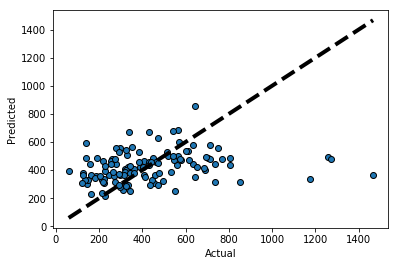

Fraud
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 273.8569465249311 seconds
MOST IMPORTANT FEATURES:
parker 0.0576158389592
#rio2016 0.0377427890206
2016 0.0342733161222
#au 0.0283004383899
oat 0.0264561527903
talk 0.023288425963
public 0.0194905035122
friend 0.0186057063351
men' 0.0183097150503
#nswrf 0.017091745782
train 0.0169566603543
#decadeofdomin #marooncrusad #18thman 0.0152024876873
🙌 0.0151145924927
hey 0.0145885309053
silver 0.014539218535
#sydney 0.0141273018329
time 0.0140853563876
💕 0.0140206827979
new zealand 0.013977042269
vs 0.0136985355672
R2: 0.118094201577
RMSE: 271.591109906
MAPE: 40.902612026
Mean APE Baseline: 50.564378615


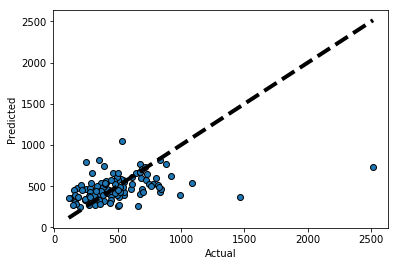

Sexual Offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 272.4848541689571 seconds
MOST IMPORTANT FEATURES:
#sydney 0.0861741243075
sydney 0.0707891304198
love 0.0418546329235
morn 0.0344860874032
day 0.0274643387383
44 0.0201905493251
think 0.0185777257399
park 0.0159956354363
newel hwi 0.0145568486655
hwi 0.013604638614
st 0.012672073327
sep 2016 0.0119324923739
good 0.0114790563928
2447 0.0111605312642
nambucca 0.0110758945202
11 0.0109894411683
thi 0.0107244468168
wa 0.0103658227713
28 0.00772483406561
onli 0.00764754831835
R2: 0.126943151344
RMSE: 87.2250736445
MAPE: 40.9043681972
Mean APE Baseline: 53.0821806583


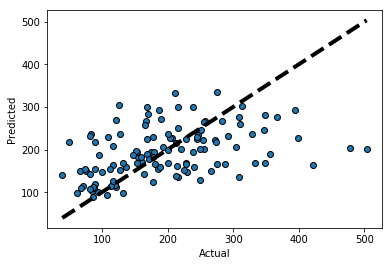

Malicious damage to property
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 272.22068737098016 seconds
MOST IMPORTANT FEATURES:
#nswfire grass 0.0857378157435
coonambl 0.0530787873423
29 dec 2016 0.0508128102118
92 0.0437495226559
#sydney 0.0361057523385
29 dec 0.034114324103
#grassfir #nswfire grass 0.0295709022482
#nswfire mva transport 0.0116179637278
ridg 0.0112391305675
equip 0.0100030731334
#grassfir advic bush 0.00981505725795
nsw 2400 0.00932990602948
sydney 0.00923675749641
newel 0.00916688947736
#other #nswfire advic 0.00893102309101
mile 0.00877187452393
cr 0.00876503131258
beat 0.00839871635502
field 0.00822106867252
tamworth 0.00819093304427
R2: 0.0652517650397
RMSE: 553.86171461
MAPE: 47.203700146
Mean APE Baseline: 53.4238936165


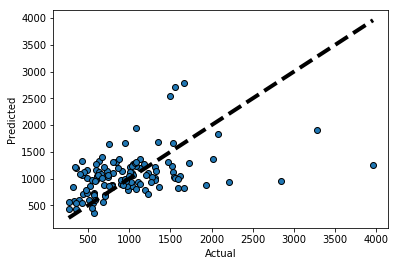

Prohibited weapons offences
Finished processing 24 records...
Finished processing 48 records...
Finished processing 72 records...
Finished processing 96 records...
Finished processing 120 records...
Finished TF-IDF 5 fold cross validation in 272.8999325858895 seconds
MOST IMPORTANT FEATURES:
#sydney 0.143662590998
#grassfir 0.0761193738236
#nswfire grass 0.0544363223522
st 0.0374388102593
#grassfir #nswfire 0.0361123436117
park 0.025451394681
love 0.0201878719285
like 0.0195964228883
#grassfir #nswfire grass 0.0187775228514
25 0.0152137514135
sydney 0.0135302109676
24 0.013295851516
11 nov 2016 0.0132575337729
home 0.0115934016035
come 0.0106613347737
assist 0.00983492451976
#nswfire structur 0.00942822926955
grass 0.00929447492845
10 0.00927585167739
11 0.00899521540593
R2: 0.255801157144
RMSE: 128.679166336
MAPE: 78.3084380238
Mean APE Baseline: 126.659859832


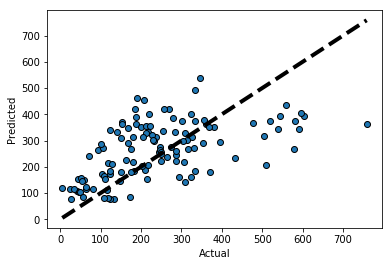

In [41]:
tfidf_output = pd.DataFrame()
print('TFIDF RFR BY LGA FOR BROADCASTERS TWEETS ONLY. MAX FEATURES 5000.')
for target in target_df.columns[1:]:
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA',target]], max_features=5000, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [42]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_2016_rfr_broadcasters_preds.csv",index=False)

In [43]:
tfidf_output

,LGA,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
0,Albury,445.47721,503.29410,588.55201,136.80177,1009.78348,267.10174
4,Bayside,251.72828,314.42407,649.16364,101.78199,606.99209,164.04653
6,Bellingen,396.95736,385.20218,465.19843,207.96625,1046.43713,262.53458
7,Berrigan,374.89439,594.46609,391.07951,232.36960,1210.30139,387.51656
8,Blacktown,320.22939,311.04829,518.44833,141.54829,779.88885,146.95456
16,Camden,393.91749,465.26022,432.51191,228.90522,969.38377,287.36136
20,Central Coast,391.61223,461.15511,526.05821,226.22669,1069.26615,178.74743
27,Cootamundra-Gundagai,438.64642,377.11897,393.40135,189.09735,946.07242,331.76081
30,Dubbo Regional,403.67501,557.76365,666.83652,190.15403,1832.44630,296.13862
31,Dungog,388.26937,563.37141,364.05949,293.05751,1169.09832,454.25516
